#### đề bài ý tưởng: Nâng Cao Doanh Thu Qua Phân Đoạn Khách Hàng(EchoMart là nền tảng thương mại điện tử đa dạng)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load dataset

In [2]:
customers = pd.read_csv('E_commerce/customers.csv')
order_items = pd.read_csv('E_commerce/order_items.csv')
orders = pd.read_csv('E_commerce/orders.csv')
products = pd.read_csv('E_commerce/products.csv')
events = pd.read_csv('E_commerce/events.csv')
reviews = pd.read_csv('E_commerce/reviews.csv')

### Cleaning data

#### customers

In [3]:
customers.isnull().sum()

customer_id         0
name                0
email               0
country             0
age                 0
signup_date         0
marketing_opt_in    0
dtype: int64

In [4]:
# Loại bỏ trùng lặp
customers = customers.drop_duplicates(subset=['customer_id'])
# Chuyển kiểu dữ liệu ngày tháng
customers['signup_date'] = pd.to_datetime(customers['signup_date'])

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       20000 non-null  int64         
 1   name              20000 non-null  object        
 2   email             20000 non-null  object        
 3   country           20000 non-null  object        
 4   age               20000 non-null  int64         
 5   signup_date       20000 non-null  datetime64[ns]
 6   marketing_opt_in  20000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(3)
memory usage: 957.2+ KB


In [6]:
customers.describe()

,customer_id,age,signup_date
count,20000.000000,20000.000000,20000
mean,10000.500000,46.492550,2022-12-07 03:27:38.880000
min,1.000000,18.000000,2020-01-01 00:00:00
25%,5000.750000,32.000000,2021-06-24 00:00:00
50%,10000.500000,46.500000,2022-12-15 00:00:00
75%,15000.250000,61.000000,2024-05-21 00:00:00
max,20000.000000,75.000000,2025-10-31 00:00:00
std,5773.647028,16.767961,NaN


#### order_items

In [5]:
order_items = order_items.drop_duplicates()

In [ ]:
# Giữ lại hàng theo quantity
order_items = order_items.drop_duplicates(subset=['order_id', 'product_id'], keep='last')

In [14]:
order_items.isnull().sum()

order_id          0
product_id        0
unit_price_usd    0
quantity          0
line_total_usd    0
dtype: int64

In [15]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59090 entries, 0 to 59162
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        59090 non-null  int64  
 1   product_id      59090 non-null  int64  
 2   unit_price_usd  59090 non-null  float64
 3   quantity        59090 non-null  int64  
 4   line_total_usd  59090 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 2.7 MB


In [10]:
order_items.describe()

,order_id,product_id,unit_price_usd,quantity,line_total_usd
count,59090.000000,59090.000000,59090.000000,59090.000000,59090.000000
mean,16812.196108,692.102572,62.861940,1.303622,81.779510
std,9688.488960,329.210913,62.073235,0.787170,106.404314
min,1.000000,1.000000,3.500000,1.000000,3.500000
25%,8454.250000,411.000000,21.640000,1.000000,24.770000
50%,16838.500000,738.000000,44.650000,1.000000,49.920000
75%,25203.000000,980.000000,79.450000,1.000000,98.680000
max,33580.000000,1197.000000,596.620000,4.000000,2376.920000


#### orders

In [7]:
orders = orders.drop_duplicates(subset=['order_id'])

In [12]:
orders.isnull().sum()

order_id          0
customer_id       0
order_time        0
payment_method    0
discount_pct      0
subtotal_usd      0
total_usd         0
country           0
device            0
source            0
dtype: int64

In [8]:
# Chuyển kiểu dữ liệu ngày tháng
orders['order_time'] = pd.to_datetime(orders['order_time'])

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33580 entries, 0 to 33579
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        33580 non-null  int64         
 1   customer_id     33580 non-null  int64         
 2   order_time      33580 non-null  datetime64[ns]
 3   payment_method  33580 non-null  object        
 4   discount_pct    33580 non-null  int64         
 5   subtotal_usd    33580 non-null  float64       
 6   total_usd       33580 non-null  float64       
 7   country         33580 non-null  object        
 8   device          33580 non-null  object        
 9   source          33580 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.6+ MB


In [15]:
orders.describe()

,order_id,customer_id,order_time,discount_pct,subtotal_usd,total_usd
count,33580.000000,33580.000000,33580,33580.000000,33580.000000,33580.000000
mean,16790.500000,10010.629899,2022-12-05 22:17:57.397081600,7.160214,144.002627,133.806357
min,1.000000,1.000000,2020-01-01 01:10:58,0.000000,3.500000,2.800000
25%,8395.750000,4964.000000,2021-06-23 11:49:25.500000,0.000000,44.060000,40.300000
50%,16790.500000,10008.000000,2022-12-05 08:43:05,5.000000,93.620000,86.460000
75%,25185.250000,15061.000000,2024-05-27 07:34:34,15.000000,187.100000,174.270000
max,33580.000000,19999.000000,2025-10-31 22:59:41,20.000000,3141.660000,2984.580000
std,9693.855356,5798.458913,NaN,7.474901,162.603585,152.130611


In [9]:
# Loại bỏ trùng lặp
products = products.drop_duplicates(subset=['product_id'])

In [17]:
products.isnull().sum()

product_id    0
category      0
name          0
price_usd     0
cost_usd      0
margin_usd    0
dtype: int64

In [18]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  1197 non-null   int64  
 1   category    1197 non-null   object 
 2   name        1197 non-null   object 
 3   price_usd   1197 non-null   float64
 4   cost_usd    1197 non-null   float64
 5   margin_usd  1197 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 56.2+ KB


In [19]:
products.describe()

,product_id,price_usd,cost_usd,margin_usd
count,1197.000000,1197.000000,1197.000000,1197.000000
mean,599.000000,119.935171,77.626483,42.308688
std,345.688444,119.681742,79.228858,44.464057
min,1.000000,3.500000,2.210000,1.030000
25%,300.000000,38.540000,23.530000,12.240000
50%,599.000000,77.200000,49.140000,27.020000
75%,898.000000,165.420000,103.670000,55.440000
max,1197.000000,596.620000,446.100000,263.730000


#### tạo model dự đoán xác suất rời bỏ của khách hàng

In [ ]:
current_date = orders['order_time'].max()
# Get last order date per customer
last_order = orders.groupby('customer_id')['order_time'].max().reset_index()
last_order['days_since_last_order'] = (current_date - last_order['order_time']).dt.days
last_order['churn'] = (last_order['days_since_last_order'] > 90).astype(int)

In [22]:
# Merge with customers
data = pd.merge(customers, last_order, on='customer_id', how='left')

# Fill NaN for customers with no orders (assume churn=1)
data['churn'] = data['churn'].fillna(1)
data['days_since_last_order'] = data['days_since_last_order'].fillna(365)  # Assume long time

In [23]:
# Features: RFM + demographics
rfm = orders.groupby('customer_id').agg({
    'order_time': ['count', lambda x: (current_date - x.max()).days],  # Frequency, Recency
    'total_usd': 'sum'  # Monetary
}).round(2)
rfm.columns = ['frequency', 'recency', 'monetary']  
rfm['recency'] = rfm['recency'].fillna(365)

In [24]:
data = pd.merge(data, rfm, left_on='customer_id', right_index=True, how='left')
data['frequency'] = data['frequency'].fillna(0)
data['monetary'] = data['monetary'].fillna(0)

In [25]:
# Features
features = ['age', 'recency', 'frequency', 'monetary']
X = data[features].fillna(0)
y = data['churn']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
# Predict
y_pred = model.predict(X_test)

In [28]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

# Coefficients (importance of features)
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
print(coef_df)

Accuracy: 0.96525
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.62      0.73       299
         1.0       0.97      0.99      0.98      3701

    accuracy                           0.97      4000
   macro avg       0.93      0.81      0.85      4000
weighted avg       0.96      0.97      0.96      4000

Confusion Matrix:
 [[ 185  114]
 [  25 3676]]
     Feature  Coefficient
0        age    -0.002752
1    recency     0.041545
2  frequency    -1.829567
3   monetary    -0.000510


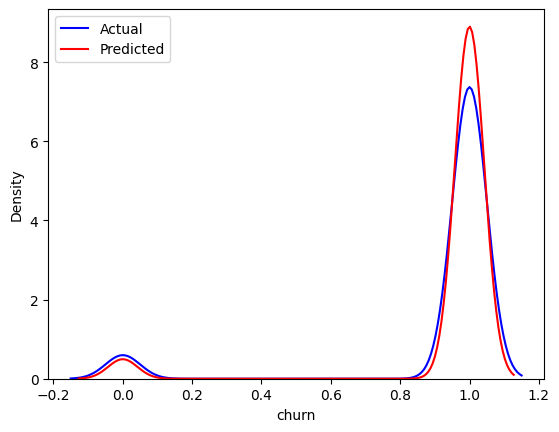

In [29]:
sns.kdeplot(data=y_test, color='blue', label='Actual')
sns.kdeplot(data=y_pred, color='red', label='Predicted')
plt.legend()
plt.show()

In [ ]:
# connect SQL server
import pyodbc

conn = pyodbc.connect(
    driver ="{SQL Server}",
    server ="DESKTOP-OBD641T\\SQLEXPRESS",
    database="ECommerceDB",
    trusted_connection="yes"
)